In [36]:
import random
import numpy as np
import serial
from serial.tools import list_ports
from psychopy import visual, core, event, clock
import tkinter as tk
import time
from PIL import Image
import matplotlib.pyplot as plt

# Experimental sequence

Notebook contains 5 sections:
1. `Rest / 75 ms vibro-stimulation`
2. `TS / Tactile Stimulation / Tactile Imagery Training`
3. `TI / Tactile Imagery / Imagery Test`
4. `TI / Tactile Imagery with 75 ms vibro-stimulation`
5. `Rest / 75 ms vibro-stimulation`

Each section is dedicated to the corresponding part of the experimental sequence

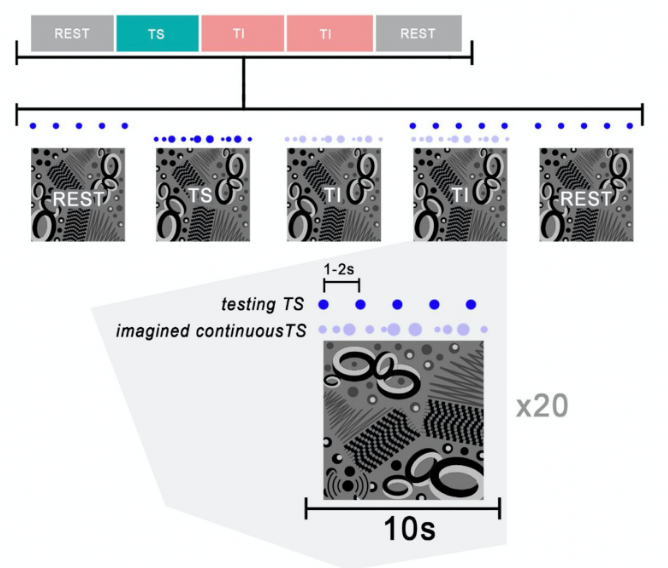

In [37]:
imagery = Image.open('4.jpg')
rest = Image.open('5.jpg')

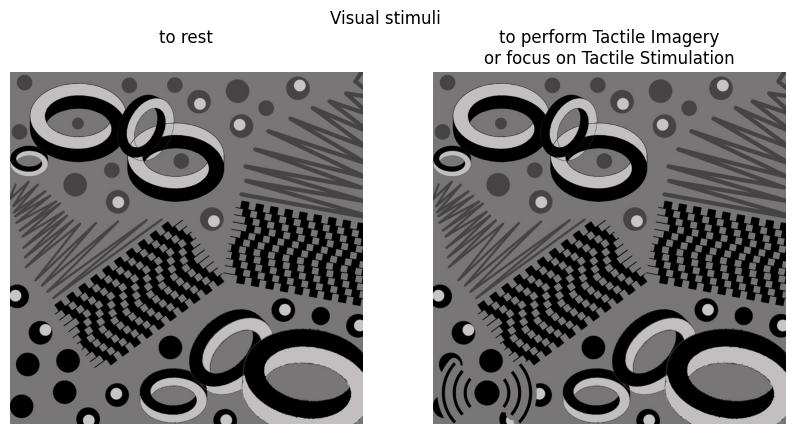

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=100)

axes[0].imshow(rest)
axes[1].imshow(imagery)

axes[0].set_axis_off()
axes[1].set_axis_off()

axes[0].set_title('to rest\n')
axes[1].set_title('to perform Tactile Imagery\nor focus on Tactile Stimulation')

plt.suptitle('Visual stimuli')

plt.show()

There are two visual stimuli used - to rest and to perform Tactile Imagery or focus on Tactile Stimulation

# Functions to vibrate

In [2]:
# Arduino messages
# int sync_im = 9; In\6
# int sync_r = 10; In\5

# 1 75 ms max sync_im 10003
# 2 75 ms max sync_r 10002
# 3 100 ms max 
# 4 100 ms 1/2 max 
# 5 100 ms 1/4 max 
# 6 sync_im
# 7 sync_r

In [3]:
try: # if you have arduino or some other device - recreate function `vibrate` to work with your device 
    ser = serial.Serial(list_ports.comports()[0].device, 9600, timeout= 0.1)
    def vibrate(message=1, ser=ser):
        ser.write(bytes(str(message), 'utf-8'))
        
except IndexError: # for testing use just empty `vibrate` function 
    def vibrate(message=1):
        pass

In [4]:
vibrate(1)
time.sleep(1)
vibrate(2)

In [5]:
# ser.close()
# del ser

# Rest / 75 ms vibro-stimulation

In [13]:
steps = np.arange(1, 2.5, 0.3)
image = Image.open('5.jpg')
image.show()
while True:
    vibrate(1)
    time.sleep(np.random.choice(steps))

KeyboardInterrupt: 

# TS / Tactile Stimulation / Tactile Imagery Training

at rest try to abstract as much as possible from imagery task

to exit Psychopy experiment - press Escape during interstimulus interval (when screen is gray)

In [13]:
# Replay to remind vibration

stims = ['4.jpg', '5.jpg']
stims_number = 15
total_stims_number = stims_number * 2
trial_time = 8
wait_till = 0
isi_time = 1.5
timediff = np.arange(0.2, 0.4, 0.05)
random_vibration_step = 0.4

timer = core.Clock()
timer.addTime(-trial_time)
time.sleep(wait_till)
while timer.getTime() < 0:
    message = random.choice([3, 4, 5])
    vibrate(message)
    t = np.random.choice(timediff)
    if t < abs(timer.getTime()):
        time.sleep(np.random.choice(timediff))

KeyboardInterrupt: 

In [14]:
root = tk.Tk()
w = root.winfo_screenwidth()
h = root.winfo_screenheight()
stims = ['4.jpg', '5.jpg']
stims_number = 15
total_stims_number = stims_number * 2
trial_time = 8
wait_till = 0
isi_time = 1.5
timediff = np.arange(0.2, 0.4, 0.05)
random_vibration_step = 0.4

txt_1 = u'Пересчитывайте элементы на картинке и фокусируйтесь на вибрации\n\nCount the elements on the picture and focus on the vibration'
txt_2 = u'Эксперимент завершен\nДля выхода нажмите "пробел"\n\nExperiment is finished\nPress "space" to exit'

win = visual.Window([w, h], color=(120, 118, 119), colorSpace='rgb255', fullscr=True, screen=0)
ISI = clock.StaticPeriod(win=win, screenHz=59, name='ISI')

####OPENING
txt = visual.TextStim(win, text= u'Обучение тактильному воображению\n\nTactile Imagery Training', font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

####OBSERVATION BEFORE
txt = visual.TextStim(win, text=txt_1, font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

# NB: fit coef for your screen size!!!
coef = 1.3
fig_size = 1080
movs = [visual.ImageStim(win, image=i, mask=None, units='', pos=(0.0, 0.0), size=(coef*fig_size/w, coef*fig_size/h), ori=0.0, color=(1.0, 1.0, 1.0), colorSpace='rgb', contrast=1.0, opacity=1.0, depth=0, interpolate=False, flipHoriz=False, flipVert=False, texRes=128, name=None, autoLog=None, maskParams=None) for i in stims]
stim_types = [0]*stims_number + [1]*stims_number
np.random.shuffle(stim_types)


for a, stim_type in zip(range(total_stims_number), stim_types):
    s0 = time.time()
    
    mov = movs[stim_type]
    mov.draw()
    win.flip() 
    
    if stim_type == 0:
        vibrate(6)
        
        timer = core.Clock()
        timer.addTime(-trial_time)
        time.sleep(wait_till)
        while timer.getTime() < 0:
            message = random.choice([3, 4, 5])
            vibrate(message)
            t = np.random.choice(timediff)
            if t < abs(timer.getTime()):
                time.sleep(np.random.choice(timediff))
        
    else:
        vibrate(7)
        
        time.sleep(trial_time)
        
    s1 = time.time()
    print(s1-s0)
    win.flip()
    ISI.start(isi_time)
    ISI.complete()
    
    if 'escape' in event.waitKeys():
        win.close()
        core.quit()

txt = visual.TextStim(win, text=txt_2, font='Consolas', pos=[0, 0],  color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])
    
win.close()
core.quit()

8.022893905639648
827.9059 	WARNING 	Monitor specification not found. Creating a temporary one...


SystemExit: 0

C:\Users\marin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# TI / Tactile Imagery / Imagery Test

в покое максимально абстрагироваться от воображения

at rest try to abstract as much as possible from imagery task

## run twice / 2 runs

to exit Psychopy experiment - press Escape during interstimulus interval (when screen is gray)

In [12]:
root = tk.Tk()
w = root.winfo_screenwidth()
h = root.winfo_screenheight()
stims = ['4.jpg', '5.jpg']
stims_number = 15
total_stims_number = stims_number * 2
trial_time = 8
isi_time = 1.5

txt_1 = u'Тестовая запись тактильного воображения\nПересчитывайте элементы на картинке\n\nImagery Test\nCount elements on the picture'
txt_2 = u'Эксперимент завершен\nДля выхода нажмите "пробел"\n\nExperiment is finished\nPress "space" to exit'

win = visual.Window([w, h], color=(120, 118, 119), colorSpace='rgb255', fullscr=True, screen=1)
ISI = clock.StaticPeriod(win=win, screenHz=59, name='ISI')

####OPENING 
txt = visual.TextStim(win, text= u'Сейчас будет эксперимент по исследованию тактильного воображения\n\nNow there will be an experiment to study Tactile Imagery', font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

####OBSERVATION BEFORE
txt = visual.TextStim(win, text=txt_1, font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

# NB: fit coef for your screen size!!!
coef = 1.3
fig_size = 1080
movs = [visual.ImageStim(win, image=i, mask=None, units='', pos=(0.0, 0.0), size=(coef*fig_size/w, coef*fig_size/h), ori=0.0, color=(1.0, 1.0, 1.0), colorSpace='rgb', contrast=1.0, opacity=1.0, depth=0, interpolate=False, flipHoriz=False, flipVert=False, texRes=128, name=None, autoLog=None, maskParams=None) for i in stims]
stim_types = [0]*stims_number + [1]*stims_number
np.random.shuffle(stim_types)

for a, stim_type in zip(range(total_stims_number), stim_types):
    s0 = time.time()
    mov = movs[stim_type]
    mov.draw()
    win.flip() 
    
    if stim_type == 0:
        vibrate(6)
    else:
        vibrate(7)
    
    core.wait(trial_time)
    
    s1 = time.time()
    print(s1-s0)
    win.flip()
    ISI.start(isi_time)
    ISI.complete()
    
    if 'escape' in event.waitKeys():
        win.close()
        core.quit()

txt = visual.TextStim(win, text=txt_2, font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])
    
win.close()
core.quit()

8.01413369178772
263.8079 	WARNING 	Monitor specification not found. Creating a temporary one...
263.8081 	WARNING 	Requested an unavailable screen number - using first available.


SystemExit: 0

C:\Users\marin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# TI / Tactile Imagery with 75 ms vibro-stimulation

at rest try to abstract as much as possible from imagery task

## run twice / 2 runs

to exit Psychopy experiment - press Escape during interstimulus interval (when screen is gray)

In [15]:
root = tk.Tk()
w = root.winfo_screenwidth()
h = root.winfo_screenheight()

stims = ['4.jpg', '5.jpg']
stims_number = 10
total_stims_number = stims_number * 2
trial_time = 10
wait_till = 0
isi_time = 1.5
timediff = np.arange(1, 2, 0.05)

txt_1 = u'В эксперименте тактильная стимуляция будет происходить в покое и во время тактильного воображения\nПересчитывайте элементы на картинке\n\nIn the experiment, Tactile Stimulation will occur at rest and during Tactile Imagery\nCount elements on the picture'
txt_2 = u'Эксперимент завершен\nДля выхода нажмите "пробел"\n\nExperiment is finished\nPress "space" to exit'

win = visual.Window([w, h], color=(120, 118, 119), colorSpace='rgb255', fullscr=True, screen=1)
ISI = clock.StaticPeriod(win=win, screenHz=59, name='ISI')

####OPENING
txt = visual.TextStim(win, text= u'Сейчас будет эксперимент по исследованию тактильной стимуляции\n\nNow there will be an experiment to study Tactile Stimulation', font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

####OBSERVATION BEFORE
txt = visual.TextStim(win, text=txt_1, font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])

# NB: fit coef for your screen size!!!
coef = 1.3
fig_size = 1080
movs = [visual.ImageStim(win, image=i, mask=None, units='', pos=(0.0, 0.0), size=(coef*fig_size/w, coef*fig_size/h), ori=0.0, color=(1.0, 1.0, 1.0), colorSpace='rgb', contrast=1.0, opacity=1.0, depth=0, interpolate=False, flipHoriz=False, flipVert=False, texRes=128, name=None, autoLog=None, maskParams=None) for i in stims]
stim_types = [0]*stims_number + [1]*stims_number
np.random.shuffle(stim_types)

for a, stim_type in zip(range(total_stims_number), stim_types):
    s0 = time.time()
    
    message = stim_type+1
    
    mov = movs[stim_type]
    mov.draw()
    win.flip()
    
#     core.wait(wait_till)
    
    w1 = random.choice(timediff)
    core.wait(w1)
    vibrate(message)

    w2 = random.choice(timediff)
    core.wait(w2)
    vibrate(message)

    w3 = random.choice(timediff)
    core.wait(w3)
    vibrate(message)
    
    w4 = random.choice(timediff)
    core.wait(w4)
    vibrate(message)
    
    w5 = random.choice(timediff)
    core.wait(w5)
    vibrate(message)
    
    core.wait(trial_time-w1-w2-w3-w4-w5-wait_till)
    
    s1 = time.time()
    print(s1-s0)
    win.flip()
    ISI.start(isi_time)
    ISI.complete()
    
    if 'escape' in event.waitKeys():
        win.close()
        core.quit()

txt = visual.TextStim(win, text=txt_2, font='Consolas', pos=[0, 0], color='black')
txt.draw()
win.flip()
event.waitKeys(keyList=['space'])
    
win.close()
core.quit()

10.012802362442017
1128.9333 	WARNING 	Monitor specification not found. Creating a temporary one...
1128.9335 	WARNING 	Requested an unavailable screen number - using first available.


SystemExit: 0

C:\Users\marin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Rest / 75 ms vibro-stimulation

In [16]:
steps = np.arange(1, 2.5, 0.3)
image = Image.open('5.jpg')
image.show()
while True:
    vibrate(1)
    time.sleep(np.random.choice(steps))

KeyboardInterrupt: 